In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

import seaborn as sns
plt.style.use('seaborn-darkgrid')

import glob

In [2]:
actively_learned_data = []
for fpath in glob.glob('data/actively_learned_koopman/*.pkl'):
    actively_learned_data.append(
        pkl.load(open(fpath, 'rb'))
    )

stable_koopman_data = []
for fpath in glob.glob('data/stable_koopman/*.pkl'):
    stable_koopman_data.append(
        pkl.load(open(fpath, 'rb'))
    )

In [3]:
actively_learned = {
    'x' : [i for i in range(2000)],
    'mean': np.median(np.stack(actively_learned_data),axis=0),
    'std' : np.std(np.stack(actively_learned_data), axis=0), 
    'max' : np.max(actively_learned_data, axis=0),
    'min' : np.min(actively_learned_data, axis=0)}
stable = {
    'x' : [i for i in range(2000)],
    'mean': np.median(np.stack(stable_koopman_data),axis=0),
    'std' : np.std(np.stack(stable_koopman_data), axis=0),
    'max' : np.max(stable_koopman_data, axis=0),
    'min' : np.min(stable_koopman_data, axis=0)}

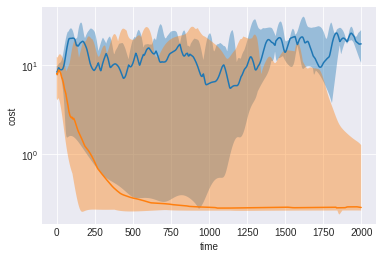

In [4]:
plt.semilogy(actively_learned['mean'])
plt.fill_between(
    actively_learned['x'], 
    np.clip(actively_learned['min'], 0, np.inf), 
    actively_learned['max'],
    alpha=0.4
)
plt.semilogy(stable['mean'])
plt.fill_between(
    stable['x'], 
    np.clip(stable['min'], 0, np.inf), 
    stable['max'],
    alpha=0.4
)

plt.ylabel('cost')
plt.xlabel('time')

plt.show()

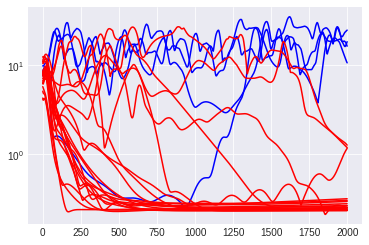

In [5]:
plt.semilogy(np.stack(actively_learned_data).T, 'b')
plt.semilogy(np.stack(stable_koopman_data).T, 'r')
plt.show()